In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [17]:
data = pd.read_csv("C:\\Users\\RUSHIKESH\\Downloads\\Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [18]:
data.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [19]:
data["High_sales"]=data.Sales.map(lambda a:1 if a>=9 else 0)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High_sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
 11  High_sales   400 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 37.6+ KB


In [21]:
label_encoder = preprocessing.LabelEncoder()
data['ShelveLoc'] = label_encoder.fit_transform(data.ShelveLoc)
data['Urban'] = label_encoder.fit_transform(data.Urban)
data['US'] = label_encoder.fit_transform(data.US)

In [22]:
X = data.iloc[:,1:-1]
Y = data.iloc[:,-1]

In [27]:
# now we will split the data into train and test :-

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)


### Building the Decision Tree using Entropy crietria :-

In [28]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [29]:
pred_train = pd.Series(model.predict(x_train))
pred_train

0      1
1      1
2      0
3      0
4      0
      ..
315    0
316    0
317    0
318    1
319    1
Length: 320, dtype: int64

In [30]:
pd.crosstab(y_train, pred_train)

col_0,0,1
High_sales,,
0,124,54
1,49,24


In [31]:
# our model has been build 

# plot the decision tree :-

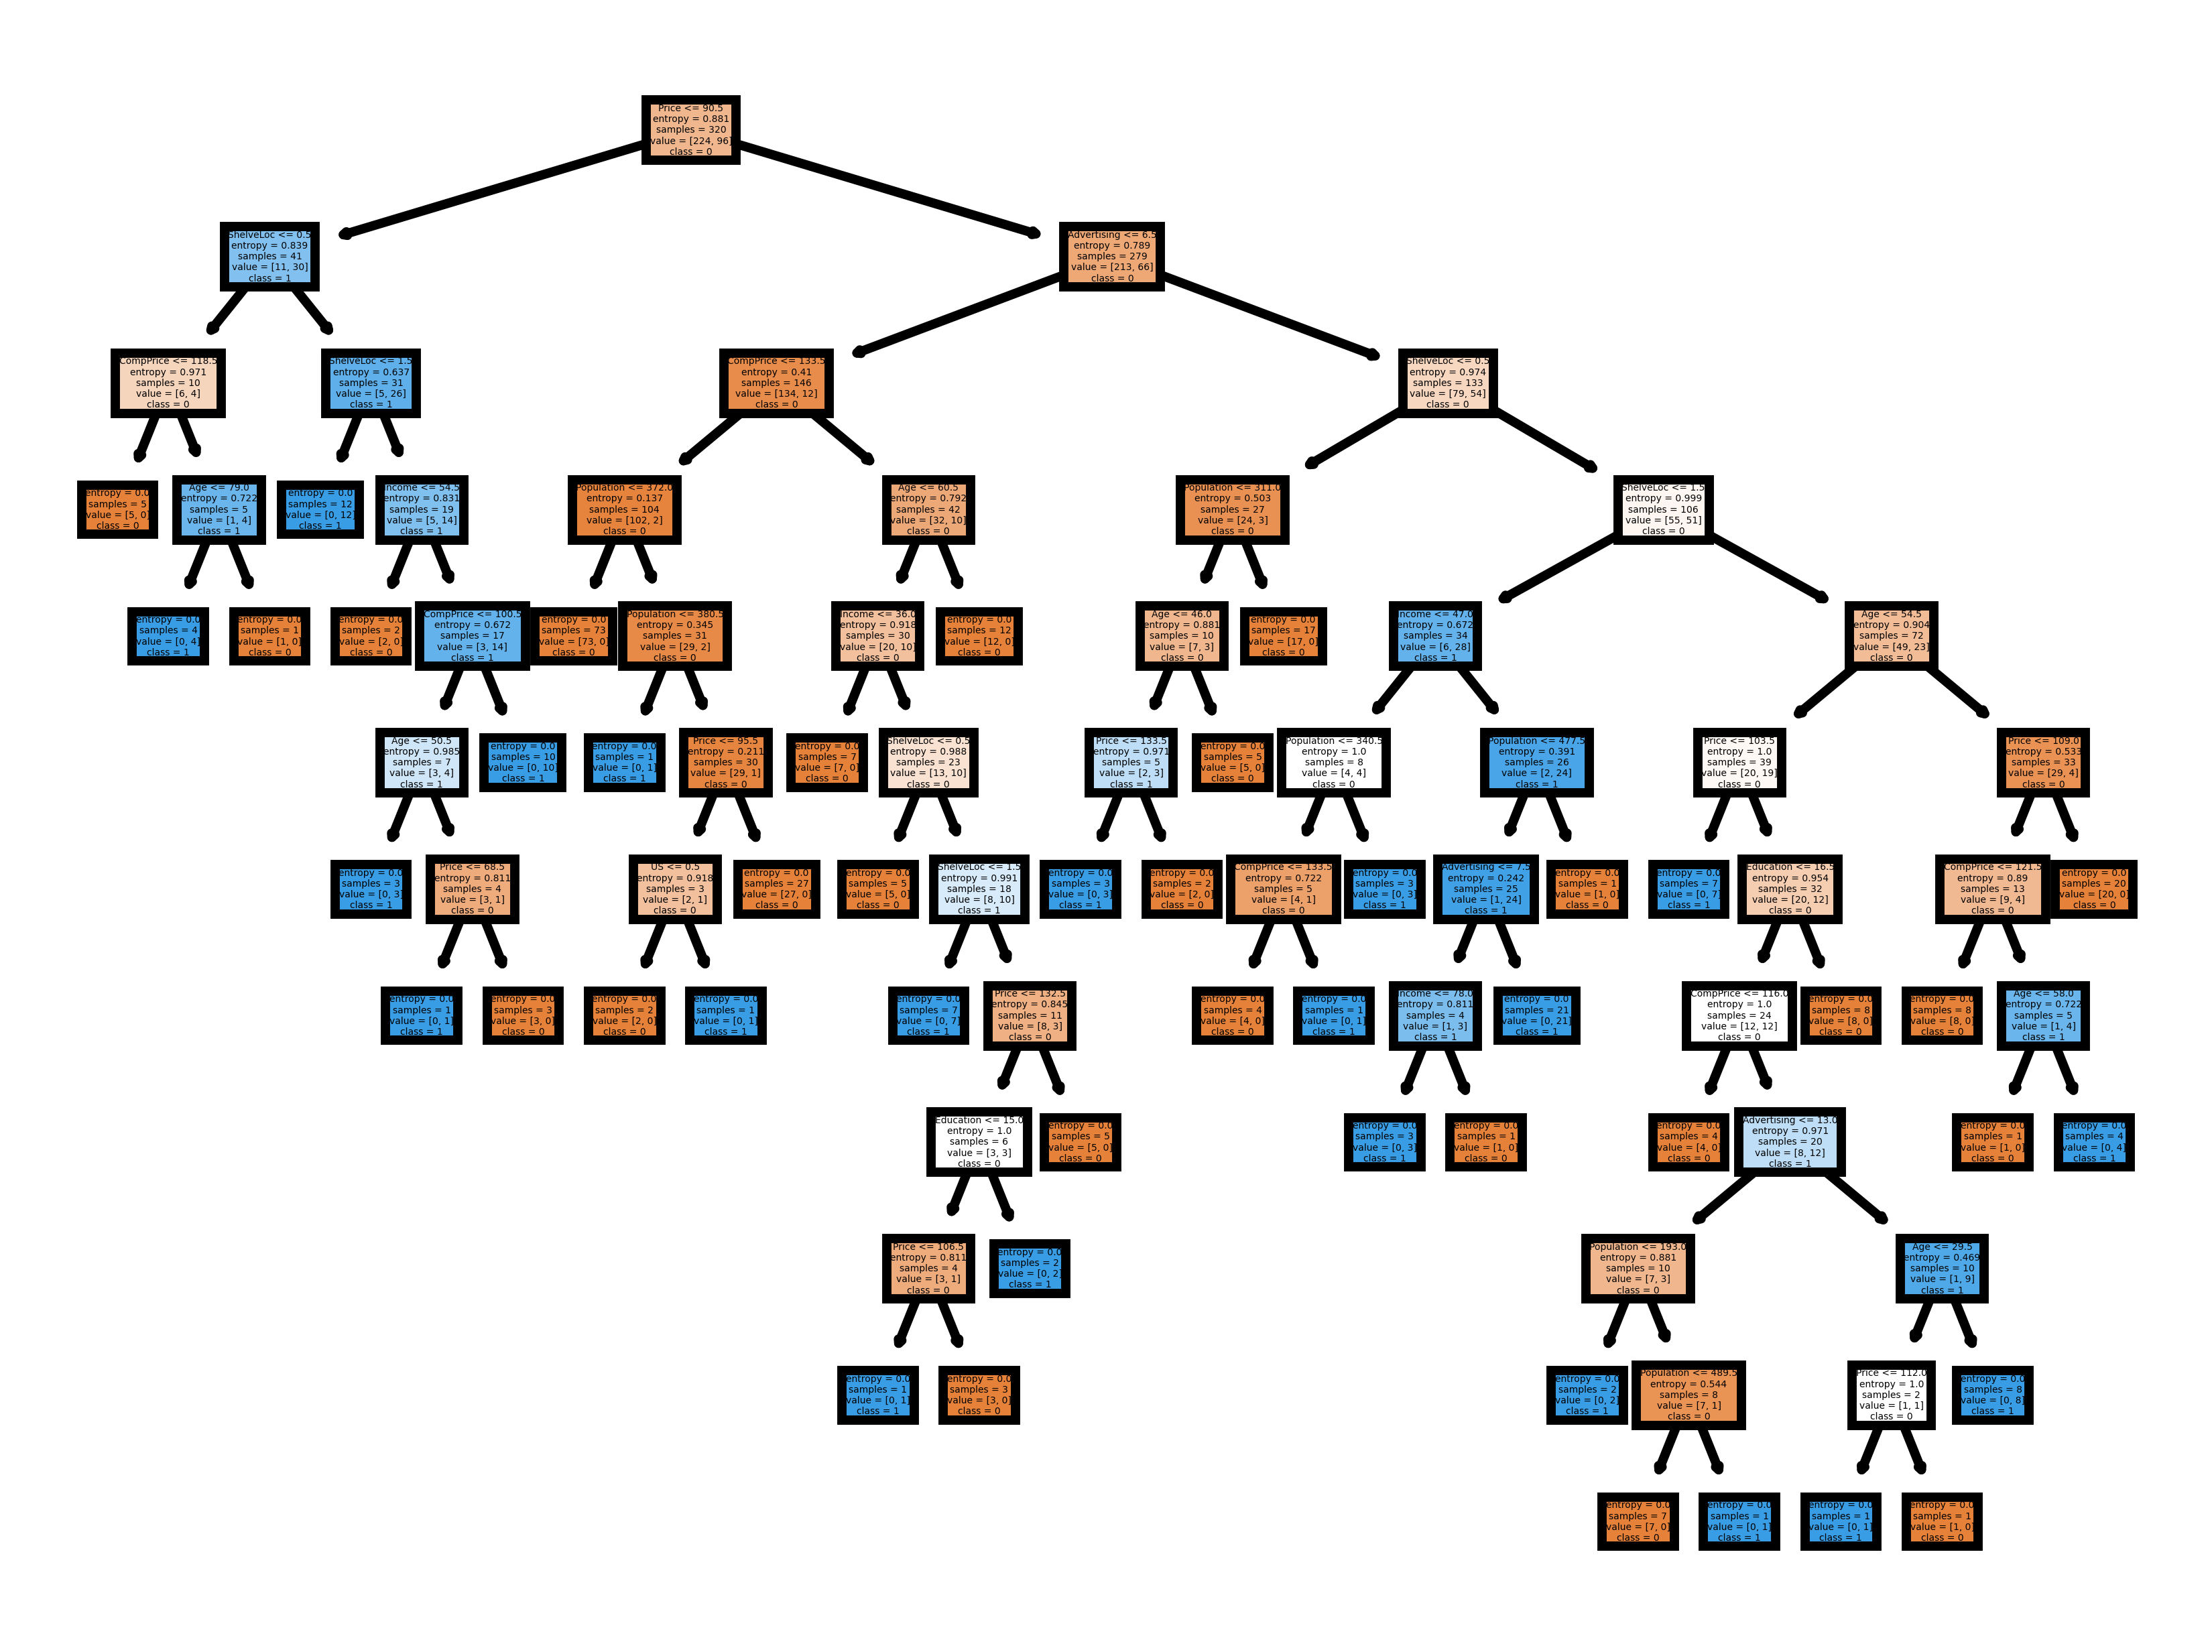

In [32]:
fn = ['CompPrice' , 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education','Urban', 'US']
cn = ['0','1']
fig,axes = plt.subplots (nrows=1, ncols=1,  figsize=(4,3), dpi=1000)
tree.plot_tree(model,
              feature_names=fn,
              class_names=cn,
              filled=True);

In [33]:
# now predicting it on test data :-

In [34]:
pred_test = model.predict(x_test)
pd.Series(pred_test)

0     0
1     0
2     0
3     0
4     0
     ..
75    1
76    0
77    0
78    1
79    0
Length: 80, dtype: int64

In [38]:
pd.crosstab(y_test, pred_test)

col_0,0,1
High_sales,,
0,56,6
1,4,14


In [39]:
# checking the accuracy :-

model.score(x_test,y_test)

0.875

In [40]:
# OR 

np.mean(pred_test==y_test)

0.875